In [ ]:
import pandas as pd
import random
import numpy as np
import os
import glob
import cv2

In [ ]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_data():
    train_dir = "/content/drive/MyDrive/data/MP_data/"
    X = []
    y = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 128)
            X.append(img)
            y.append(j)
    return X,y

In [ ]:
X, y = get_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [ ]:
#converted images into numpy array
X = np.asarray(X)
y = np.asarray(y)
print(X.shape,y.shape)

(5105, 128, 64, 3) (5105,)


In [ ]:
#X = np.reshape(X, (X.shape[0], -1))

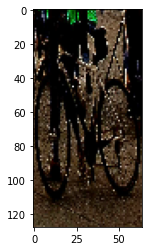

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[10])

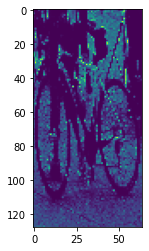

In [ ]:
from skimage import color
data_gray = [ color.rgb2gray(i) for i in X]
plt.imshow(data_gray[10])

In [ ]:
from skimage.feature import hog
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=9, pixels_per_cell=(ppc,ppc),
                       cells_per_block=(2, 2),block_norm='L2-Hys',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

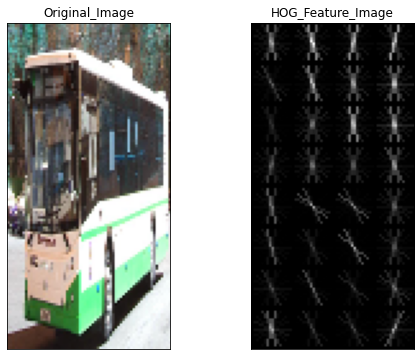

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(X[1001])
ax[0].set_title('Original_Image')
ax[1].imshow(hog_image, cmap='gray')
ax[1].set_title('HOG_Feature_Image')
plt.show()

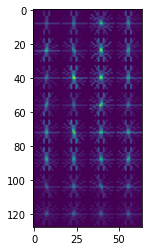

In [ ]:
plt.imshow(hog_images[10])

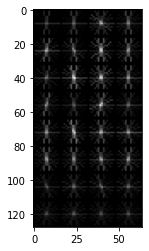

In [ ]:
plt.imshow(hog_images[10],cmap="gray")

In [ ]:
hog_features = np.array(hog_features)

In [ ]:
y=y.reshape((-1,1))

In [ ]:
X = np.reshape(X, (X.shape[0], -1))

In [ ]:
print("Original Feature Matrix","    ","HOG Feature Matrix")
print("   ",X.shape,"             ",hog_features.shape)

Original Feature Matrix      HOG Feature Matrix
    (5105, 24576)               (5105, 756)


In [ ]:
data_frame = np.hstack((hog_features,y))

In [ ]:
np.random.shuffle(data_frame)

In [ ]:
pd.DataFrame(data_frame)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756
0,0.227658,0.108942,0.117224,0.196065,0.181169,0.100786,0.187516,0.120133,0.227658,0.227658,0.116333,0.109940,0.077862,0.227658,0.035480,0.116006,0.128062,0.227658,0.227658,0.123552,0.118852,0.141442,0.227658,0.159649,0.114366,0.060178,0.227658,0.213032,0.102688,0.074429,0.172140,0.227658,0.184560,0.188914,0.099296,0.227658,0.229003,0.126696,0.119734,0.084798,...,0.030472,0.033500,0.045052,0.215070,0.119037,0.280138,0.280138,0.196340,0.138442,0.215840,0.130787,0.127307,0.280138,0.280138,0.280138,0.166176,0.121154,0.086107,0.138347,0.068332,0.280138,0.060848,0.032185,0.103203,0.067094,0.076435,0.039913,0.029812,0.032773,0.044075,0.280138,0.119634,0.280138,0.054146,0.113559,0.057765,0.046758,0.059015,0.173926,3.0
1,0.265044,0.139821,0.114555,0.169355,0.265044,0.106265,0.023593,0.072374,0.087154,0.265044,0.129509,0.110158,0.171750,0.265044,0.027403,0.035815,0.027951,0.251515,0.265044,0.103026,0.155838,0.147958,0.265044,0.082438,0.025962,0.052435,0.208572,0.265044,0.131251,0.091989,0.198698,0.265044,0.160102,0.096032,0.042723,0.123016,0.223449,0.057551,0.048952,0.076322,...,0.210814,0.045043,0.123498,0.110314,0.105376,0.096646,0.132458,0.264777,0.264777,0.175011,0.122196,0.264777,0.264777,0.101334,0.073742,0.183731,0.264777,0.150388,0.129421,0.094943,0.150721,0.067807,0.039332,0.038245,0.029420,0.063394,0.079002,0.226295,0.048351,0.132567,0.169465,0.144138,0.264777,0.143237,0.209503,0.248249,0.260137,0.132156,0.112062,0.0
2,0.229383,0.229383,0.169326,0.070731,0.202225,0.060441,0.140410,0.098796,0.191622,0.229383,0.110356,0.096571,0.172423,0.190652,0.155562,0.229383,0.229383,0.229383,0.229383,0.169400,0.229383,0.158141,0.229383,0.083707,0.044864,0.115846,0.229383,0.229383,0.109941,0.061336,0.097144,0.069025,0.069660,0.060516,0.094771,0.203295,0.242585,0.111925,0.097944,0.174874,...,0.012856,0.045117,0.075274,0.247369,0.143375,0.247369,0.119969,0.245686,0.064762,0.143584,0.088090,0.247369,0.247369,0.120770,0.232909,0.247369,0.229894,0.102393,0.143212,0.137253,0.247369,0.146238,0.206276,0.247369,0.096648,0.052212,0.019075,0.010816,0.037957,0.063328,0.219773,0.109327,0.247369,0.048553,0.190998,0.026422,0.051468,0.036160,0.159349,2.0
3,0.237157,0.170300,0.220531,0.152205,0.182619,0.100832,0.118259,0.073920,0.178080,0.237157,0.136819,0.129161,0.079858,0.124313,0.094324,0.106545,0.100373,0.183981,0.180777,0.087134,0.102399,0.044908,0.135439,0.079468,0.128398,0.109969,0.190833,0.237157,0.237157,0.237157,0.159619,0.237157,0.220428,0.219737,0.156936,0.237157,0.203059,0.108940,0.102843,0.063586,...,0.072209,0.099805,0.140576,0.109106,0.282458,0.282458,0.215595,0.149705,0.061124,0.098691,0.050557,0.089820,0.144900,0.148615,0.100230,0.172028,0.196111,0.104888,0.117378,0.130529,0.147488,0.282458,0.282458,0.282458,0.282458,0.151923,0.144905,0.082771,0.114402,0.161136,0.142942,0.137094,0.097530,0.111136,0.127014,0.132062,0.089880,0.100824,0.169608,6.0
4,0.247022,0.065410,0.077513,0.090362,0.117307,0.139847,0.252044,0.197980,0.199574,0.167142,0.116743,0.110196,0.136195,0.219879,0.181420,0.114845,0.075724,0.096771,0.120339,0.151410,0.135587,0.122257,0.205542,0.252044,0.240537,0.203784,0.252044,0.015685,0.029358,0.072926,0.209607,0.252044,0.252044,0.208364,0.046883,0.020061,0.160510,0.112111,0.105824,0.130791,...,0.167516,0.126812,0.091266,0.047343,0.036089,0.034566,0.077451,0.112987,0.123491,0.151540,0.097334,0.066867,0.291717,0.201684,0.150428,0.212041,0.225081,0.270007,0.291717,0.291717,0.291717,0.038829,0.024998,0.041211,0.085810,0.110307,0.083407,0.061998,0.046933,0.033778,0.291717,0.182171,0.291717,0.035652,0.029376,0.006729,0.022711,0.153053,0.291717,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [ ]:
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()


In [ ]:
print('Training data shape: ', x_train.shape,y_train.shape)
print('Validation data shape: ', x_test.shape,y_test.shape)

Training data shape:  (4084, 756) (4084,)
Validation data shape:  (1021, 756) (1021,)


In [ ]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear',C=1.0)
svm_classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_classifier.score(x_test,y_test)

0.5083251714005876

In [ ]:
y_predict_train = svm_classifier.predict(x_train)
y_predict_test = svm_classifier.predict(x_test)

In [ ]:
def Accuracy(actual,predict):
    acc=np.sum((actual==predict))/actual.shape[0]
    return acc*100

In [ ]:
print("Training set Accuracy of SVM With HOG",Accuracy(y_train,y_predict_train))
print("Validation set Accuracy of SVM with HOG",Accuracy(y_test,y_predict_test))

Training set Accuracy of SVM With HOG 77.179236043095
Validation set Accuracy of SVM with HOG 50.83251714005876


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict_test)

In [ ]:
print(cm)

[[82  4  2  1  2 20  6  5  2  0]
 [ 6 53  3  6  9  6 14  6  4  3]
 [ 0  2 78  7  1  5  0  7 16  1]
 [ 2  3  6 36  2  6 24  7  2  1]
 [11  7  1  5 94 10  2  0  0  2]
 [18  2  2  3  1 45  8  0  0  1]
 [ 4  2  1 22  1  5 43  3  6  0]
 [ 4  7 32 11  2 10  4 33 21  2]
 [ 1  3 21 15  1  2  9 13 44  0]
 [ 2 16  1  2  1  9  4  1  0 11]]


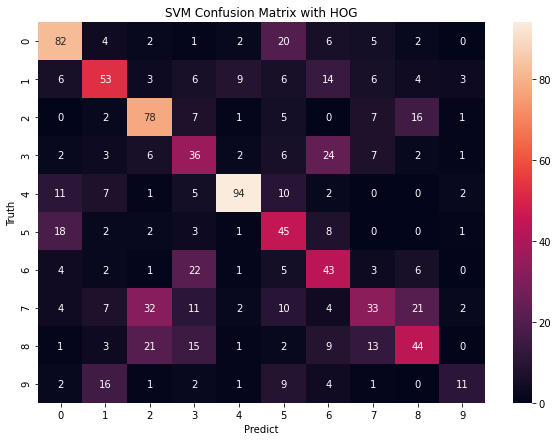

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("SVM Confusion Matrix with HOG")
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn import metrics
print("SVM Performance Matrics with HOG")
print(metrics.classification_report(y_test, y_predict_test))

SVM Performance Matrics with HOG
              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56        99
         1.0       0.42      0.53      0.47        85
         2.0       0.46      0.60      0.52       132
         3.0       0.31      0.31      0.31        91
         4.0       0.79      0.75      0.77       138
         5.0       0.44      0.48      0.46       106
         6.0       0.42      0.40      0.41       111
         7.0       0.36      0.29      0.32       104
         8.0       0.53      0.40      0.46       118
         9.0       0.60      0.41      0.48        37

    accuracy                           0.49      1021
   macro avg       0.49      0.47      0.48      1021
weighted avg       0.49      0.49      0.49      1021

